# 1. Gathering the data


Selecting four categories, namely Biology, Chemistry, Physics and Datascience from the Stack Exchange Data Dump and uploading the relevant files. 

In [1]:
#installing the required package
!pip install py7zr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 611.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 5.1 MB/s eta 0:00:00


In [2]:
#getting the files of the categories needed form stackexchange
!wget https://archive.org/download/stackexchange/biology.stackexchange.com.7z
!wget https://archive.org/download/stackexchange/chemistry.stackexchange.com.7z
!wget https://archive.org/download/stackexchange/physics.stackexchange.com.7z
!wget https://archive.org/download/stackexchange/datascience.stackexchange.com.7z

--2023-04-29 16:46:18--  https://archive.org/download/stackexchange/biology.stackexchange.com.7z
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia800107.us.archive.org/27/items/stackexchange/biology.stackexchange.com.7z [following]
--2023-04-29 16:46:19--  https://ia800107.us.archive.org/27/items/stackexchange/biology.stackexchange.com.7z
Resolving ia800107.us.archive.org (ia800107.us.archive.org)... 207.241.232.17
Connecting to ia800107.us.archive.org (ia800107.us.archive.org)|207.241.232.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75017361 (72M) [application/x-7z-compressed]
Saving to: ‘biology.stackexchange.com.7z’

biology.stackexchan 100%[===================>]  71.54M   386KB/s    in 2m 28s  

2023-04-29 16:48:47 (497 KB/s) - ‘biology.stackexchange.com.7z’ saved [75017361/75017361]

--2023-04-29 16:48:47

In [3]:
import py7zr
import pandas as pd
import xml.etree.ElementTree as ET
import re

Extracting the necessary files and renaming them in the format: '[Category].Posts.xml' and '[Category].Comments.xml'

In [4]:
files = ['biology.stackexchange.com.7z', 'chemistry.stackexchange.com.7z',  'physics.stackexchange.com.7z', 'datascience.stackexchange.com.7z'] 

for i in files:
    site_name = i.split('.')[0]
    #extract relevant files
    with py7zr.SevenZipFile(i, 'r') as archive:
        archive.extract(targets=['Posts.xml', 'Comments.xml'])
    # rename 
    for f in ['Posts.xml', 'Comments.xml']:
        with open(f, 'r') as file:
            content = file.read()
        new_name = f"{site_name}_{f[:-4]}.xml"
        with open(new_name, 'w') as file:
            file.write(content)



In [5]:
files = ['biology_Posts.xml', 'biology_Comments.xml', 'chemistry_Posts.xml', 'chemistry_Comments.xml', 'physics_Posts.xml', 'physics_Comments.xml', 'datascience_Posts.xml', 'datascience_Comments.xml']

In [6]:
iterparse_items = {"row": ["Id", "PostTypeId", "AcceptedAnswerId", "CreationDate", "Score", "ViewCount", "Body", "OwnerUserId", "LastActivityDate", "Title", "Tags", "AnswerCount", "CommentCount", "ContentLicense", "Text", "PostId"]}

In [7]:
dfs = []
node = next(iter(iterparse_items))

Reading the XML files into dataframes.

In [8]:
for i in files:
    data = []
    site_name = i.split('_')[0]

    for event, elem in ET.iterparse(i, events=('start', 'end')):
        curr_elem = (
            elem.tag.split('}')[1] if '}' in elem.tag else elem.tag
        )

        if event == 'start':
            if curr_elem == 'row':
                row = {}

            for col in iterparse_items['row']:
                if curr_elem == col:
                    row[col] = (
                        elem.text.strip()
                        if elem.text is not None
                        else elem.text
                    )
                if col in elem.attrib:
                    row[col] = elem.attrib[col].strip()

        if event == 'end':
            if curr_elem == 'row':
                data.append(row)
                elem.clear()

    df_posts = pd.DataFrame(data)
    df_posts['site'] = site_name
    dfs.append(df_posts)

In [9]:
df_biology_posts = dfs[0]
df_biology_comments = dfs[1]
df_chemistry_posts = dfs[2]
df_chemistry_comments = dfs[3]
df_physics_posts = dfs[4]
df_physics_comments = dfs[5]
df_datascience_posts = dfs[6]
df_datascience_comments = dfs[7]


In [ ]:
df_biology_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106422 entries, 0 to 106421
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Id              106422 non-null  object
 1   CreationDate    106422 non-null  object
 2   Score           106422 non-null  object
 3   ContentLicense  106422 non-null  object
 4   Text            106422 non-null  object
 5   PostId          106422 non-null  object
 6   site            106422 non-null  object
dtypes: object(7)
memory usage: 5.7+ MB


In [10]:
posts = [df_biology_posts,df_chemistry_posts , df_physics_posts, df_datascience_posts ]
comments = [df_biology_comments, df_chemistry_comments,df_physics_comments,df_datascience_comments]

In [ ]:
df_biology_posts.head(5)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,site
0,1,1,59,2011-12-14T21:17:44.370,25,7599,"<p>In prokaryotic translation, how critical fo...",28,2012-02-20T17:42:02.997,What is the criticality of the ribosome bindin...,<ribosome><binding-sites><translation><synthet...,1,0,CC BY-SA 3.0,biology
1,2,1,12,2011-12-14T21:17:48.270,21,1488,<p>Does anyone have any suggestions to prevent...,12,2012-02-16T11:10:57.530,How is RNAse contamination in RNA based experi...,<rna><biochemistry>,3,4,CC BY-SA 3.0,biology
2,3,1,31,2011-12-14T21:17:50.423,22,805,<p>Tortora writes in <em>Principles of Anatomy...,NaN,2012-01-22T10:34:58.940,Are lymphocyte sizes clustered in two groups?,<immunology><cell-biology><hematology>,1,0,CC BY-SA 3.0,biology
3,4,1,105,2011-12-14T21:19:43.527,28,20730,<p>Various people in our lab will prepare a li...,25,2018-10-03T13:40:21.967,How long does antibiotic-dosed LB maintain goo...,<cell-culture>,3,0,CC BY-SA 3.0,biology
4,5,1,24,2011-12-14T21:22:40.450,19,2891,<p>Are there any cases in which the splicing m...,43,2012-09-13T08:36:24.423,Is exon order always preserved in splicing?,<splicing><mrna><spliceosome><introns><exons>,3,3,CC BY-SA 3.0,biology


Combining all the posts dataframes and comments dataframes into two final dataframes

In [11]:
#merging all the posts into a final dataset
list_dfs = []


for df in posts:
    df.dropna(inplace = True)
    list_dfs.append(df.sample(n=500, random_state=42))


final = pd.concat(list_dfs, axis=0, ignore_index=True)


In [12]:
list_dfs_two = []


for df in comments:
    df.dropna(inplace = True)
    list_dfs_two.append(df.sample(n=500, random_state=42))


final_comments = pd.concat(list_dfs_two, axis=0, ignore_index=True)

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                2000 non-null   object
 1   PostTypeId        2000 non-null   object
 2   AcceptedAnswerId  2000 non-null   object
 3   CreationDate      2000 non-null   object
 4   Score             2000 non-null   object
 5   ViewCount         2000 non-null   object
 6   Body              2000 non-null   object
 7   OwnerUserId       2000 non-null   object
 8   LastActivityDate  2000 non-null   object
 9   Title             2000 non-null   object
 10  Tags              2000 non-null   object
 11  AnswerCount       2000 non-null   object
 12  CommentCount      2000 non-null   object
 13  ContentLicense    2000 non-null   object
 14  site              2000 non-null   object
dtypes: object(15)
memory usage: 234.5+ KB


# 3. Cleaning the Data

In [ ]:
# dropping unnecessary columns
final = final.drop(['AcceptedAnswerId', 'ContentLicense'], axis=1)


In [ ]:
# convert the type of columns
final['CreationDate'] = pd.to_datetime(final['CreationDate'])
final['LastActivityDate'] = pd.to_datetime(final['LastActivityDate'])
final['Score'] = pd.to_numeric(final['Score'], errors='coerce')
final['ViewCount'] = pd.to_numeric(final['ViewCount'], errors='coerce')
final['AnswerCount'] = pd.to_numeric(final['AnswerCount'], errors='coerce')
final['CommentCount'] = pd.to_numeric(final['CommentCount'], errors='coerce')

In [ ]:
print(final.isnull().sum())

Id                  0
PostTypeId          0
CreationDate        0
Score               0
ViewCount           0
Body                0
OwnerUserId         0
LastActivityDate    0
Title               0
Tags                0
AnswerCount         0
CommentCount        0
site                0
dtype: int64


In [ ]:
final.to_csv('final_posts.csv')

# 3. Exploratory Data Anlysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#summary statistics
print(final[['Score', 'ViewCount', 'AnswerCount', 'CommentCount']].describe())

             Score      ViewCount  AnswerCount  CommentCount
count  2000.000000    2000.000000  2000.000000   2000.000000
mean      3.910500    3067.653500     1.523000      1.772500
std       7.370187   12923.489878     0.888181      2.431193
min      -7.000000      12.000000     1.000000      0.000000
25%       1.000000     139.000000     1.000000      0.000000
50%       2.000000     458.000000     1.000000      1.000000
75%       5.000000    1759.250000     2.000000      3.000000
max     110.000000  461414.000000     9.000000     16.000000


Visualising histograms to display the frequency of the numerical columns of the posts dataframe

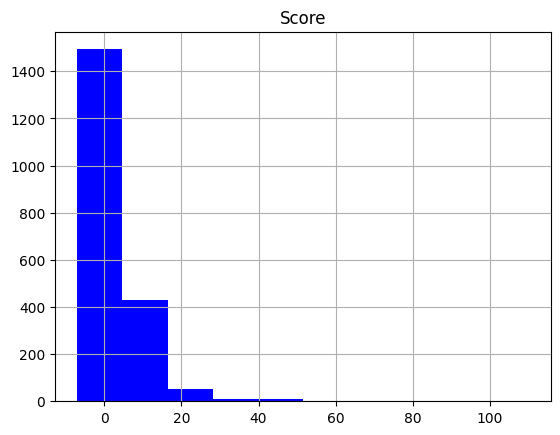

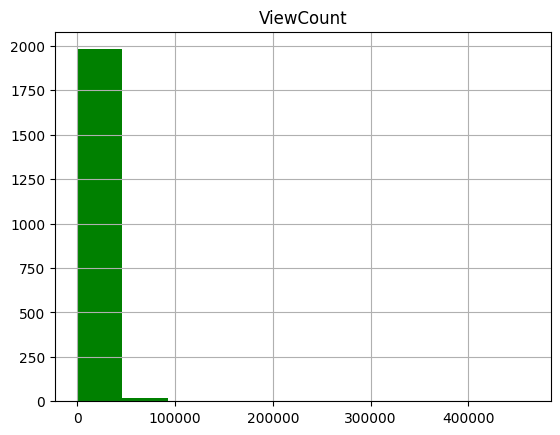

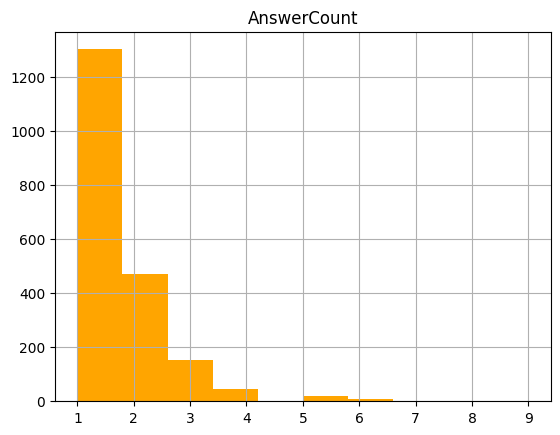

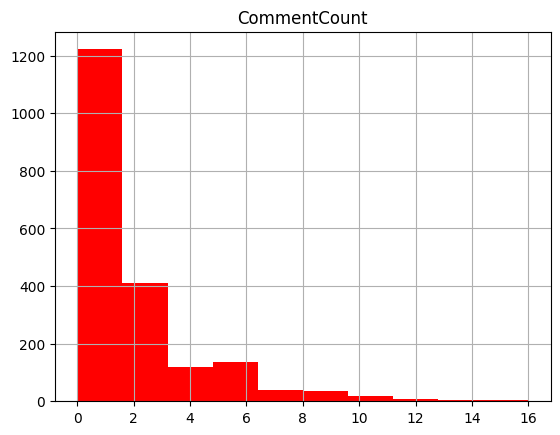

In [ ]:
# histograms
final[['Score']].hist(color = 'blue')
final[['ViewCount']].hist(color = 'green')
final[['AnswerCount']].hist(color = 'orange')
final[['CommentCount']].hist(color = 'red')

plt.show()
plt.show()

Producing scatter plots to visualise any possible relationship between the numerical columns of the posts dataset

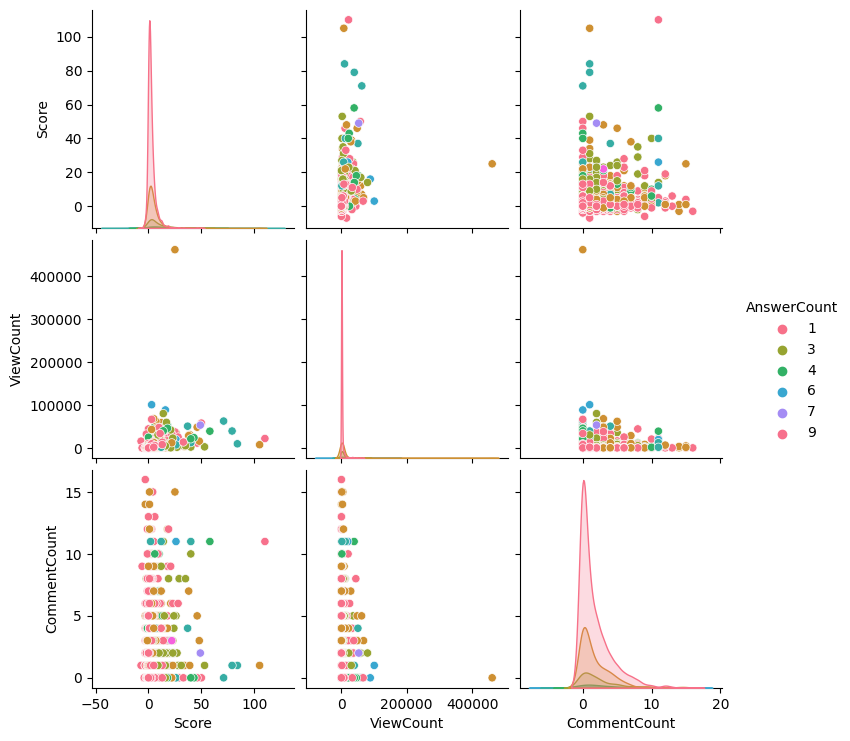

In [ ]:
#scatter plot
sns.pairplot(final[['Score', 'ViewCount', 'AnswerCount', 'CommentCount']],
             hue='AnswerCount',
             palette='husl')
plt.show()

Investigating any existing correlation between the numerical columns of the posts dataframe

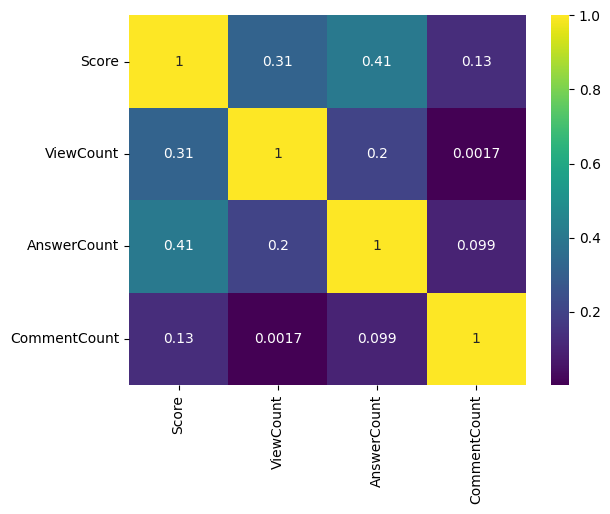

In [ ]:
#heatmap to show the correlation

matrix = final[['Score', 'ViewCount', 'AnswerCount', 'CommentCount']].corr()
sns.heatmap(matrix, cmap='viridis', annot=True)
plt.show()


Displyaing a bar chart to visualise the top 10 frequent tags 

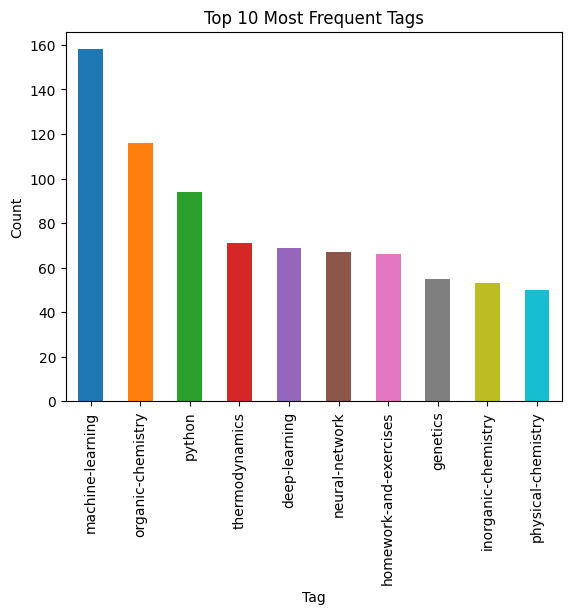

In [ ]:
#creating a bar chart of the frequency of the tags

tags = final['Tags'].str.split('><')
tag_list = []
for tag_row in tags:
    for tag in tag_row:
        tag_list.append(tag.strip('<').strip('>'))
#counting the tags and taking the most frequent ones
tag_counts = pd.Series(tag_list).value_counts().nlargest(10)




#plotting
colors = plt.cm.tab10(range(len(tag_counts)))
tag_counts.plot.bar(color=colors)
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Tag')
plt.ylabel('Count')

plt.show()


Creating boxplots of the AnswerCount, CommentCount, Score and ViewCount columns in order to invstigate the presence of outliers




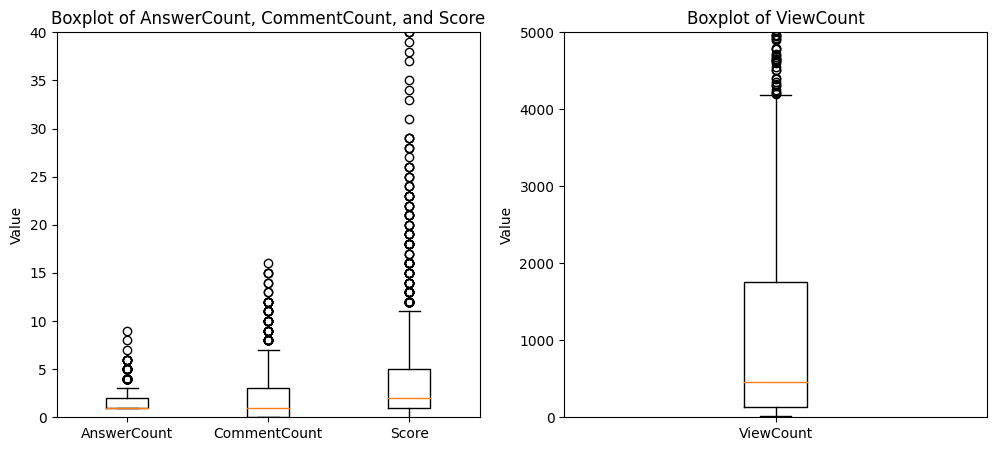

In [ ]:
#boxflot to check for outliers
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].boxplot(final[['AnswerCount', 'CommentCount', 'Score']].values,
               labels=['AnswerCount', 'CommentCount', 'Score'])

axs[0].set_ylabel('Value')
axs[0].set_title('Boxplot of AnswerCount, CommentCount, and Score')
axs[1].boxplot(final['ViewCount'].values,
               labels=['ViewCount'])
axs[1].set_ylabel('Value')
axs[1].set_title('Boxplot of ViewCount')
axs[0].set_ylim(bottom=0, top=40)
axs[1].set_ylim(bottom=0, top=5000)

plt.show()

# 4. Pre-Processing the data

Creating a function clean_text in order to convert all text to lowercase and remove any puncuation, stopword, extra space, and special character from the Body and Title column of the posts dataset and from the Text column of the comments dataset

In [13]:
import re
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import tensorflow as tf

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#only mantaining the column that are necessary for the classification task
final = final[['Body', 'Title', 'Tags',  'site']]

In [ ]:
final.tail(10)

,Body,Title,Tags,site
1990,"<p>I know this was asked before, but I didn't ...",Complete IPv4 Address Space,<text>,datascience
1991,<p>I'm training an <code>LSTM</code> with <cod...,Does small batch size improve the model?,<keras><loss-function><mini-batch-gradient-des...,datascience
1992,<p>I have a weight function f that outputs a n...,How to find splits in data so that each split ...,<machine-learning><data-mining><statistics>,datascience
1993,"<p>I'm using SciKit-Learn's <a href=""https://s...",How do I Profile a Jupyter Cell and Rank it by...,<scikit-learn><jupyter><one-hot-encoding>,datascience
1994,<p>I have been playing with a toy problem to c...,scikit-learn RandomForestClassifier always hit...,<scikit-learn><random-forest><accuracy>,datascience
1995,<p>My question is that what will happen if I a...,Different activation function in same layer of...,<machine-learning><neural-network><deep-learni...,datascience
1996,<p>Most of the advanced deep learning models l...,Reason for square images in deep learning,<deep-learning><image-classification><image-re...,datascience
1997,<p>I want to convert String data to Numeric da...,Converting String Data to Numeric data,<machine-learning><scikit-learn><machine-learn...,datascience
1998,"<p>I was looking at text classification, and f...",Which are the worse machine learning models fo...,<machine-learning><classification><text-classi...,datascience
1999,<p>I would like to understand regularization/s...,Connection between Regularization and Gradient...,<machine-learning><data-mining>,datascience


In [15]:
#function to clean the text
def clean_text(text):
    #removing html tags
    text = re.sub('<.*?>', '', text)
    #remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    #convert all text to lowercase
    text = text.lower()
    #remove the stopwordss
    stopwords_list = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    return text

In [ ]:
final['Body'] = final['Body'].apply(lambda x: clean_text(x))
final['Title'] = final['Title'].apply(lambda x: clean_text(x))

In [16]:
final_comments['Text'] = final_comments['Text'].apply(lambda x: clean_text(x))

In [17]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00


# 5. Implementing the Baseline model

First Implementation: considering the posts dataset

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'site'.
final['label']= label_encoder.fit_transform(final['site'])

In order to implement the baseline model on the posts dataframe, the following is being executed:
<br>
- Splitting the dataframe into training and testing datasets.
<br>
- Defining the Tokenizer and fitting it to the training set.
<br>
- Converting the text data to sequences of integers.
<br>
- Padding the sequences in order to have a uniform length.
<br>
- Converting the labels to integers.
<br>
- Building, compiling and training the model.


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# splitting the data into training and testing sets
train_x, test_x , train_y, test_y = train_test_split(final['Body'], final['label'], stratify = final['label'])

# defining the tokenizer and fit it to the training data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_x)

# converting the text data to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

# padding the sequences to have a uniform length
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# converting the labels to integers
train_labels = train_y.values
test_labels = test_y.values

# building the model
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=64, input_length=max_length))
model.add(LSTM(units=64))
model.add(Dense(units=4, activation='softmax'))

# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training the model
history = model.fit(train_padded, train_labels, epochs=50, batch_size=32, validation_split=(0.2))


Epoch 1/50
38/38 [==============================] - 16s 303ms/step - loss: 1.3855 - accuracy: 0.2742 - val_loss: 1.3847 - val_accuracy: 0.3200
Epoch 2/50
38/38 [==============================] - 5s 125ms/step - loss: 1.3485 - accuracy: 0.3075 - val_loss: 1.2914 - val_accuracy: 0.3900
Epoch 3/50
38/38 [==============================] - 6s 146ms/step - loss: 1.1447 - accuracy: 0.4458 - val_loss: 1.3536 - val_accuracy: 0.2867
Epoch 4/50
38/38 [==============================] - 3s 88ms/step - loss: 1.0707 - accuracy: 0.4758 - val_loss: 1.0939 - val_accuracy: 0.3733
Epoch 5/50
38/38 [==============================] - 3s 84ms/step - loss: 1.0209 - accuracy: 0.4867 - val_loss: 1.0983 - val_accuracy: 0.3800
Epoch 6/50
38/38 [==============================] - 4s 95ms/step - loss: 1.0257 - accuracy: 0.4850 - val_loss: 1.0882 - val_accuracy: 0.4667
Epoch 7/50
38/38 [==============================] - 3s 87ms/step - loss: 1.0258 - accuracy: 0.4817 - val_loss: 1.1176 - val_accuracy: 0.3600
Epoch 8/5

Building on top of the original model with LSTM in order to try and improve the performance

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training the model
history = model.fit(train_padded, train_labels, epochs=50, batch_size=50, validation_split=(0.2))

Epoch 1/50
24/24 [==============================] - 9s 243ms/step - loss: 1.3751 - accuracy: 0.2933 - val_loss: 1.3531 - val_accuracy: 0.2900
Epoch 2/50
24/24 [==============================] - 4s 163ms/step - loss: 1.0794 - accuracy: 0.5408 - val_loss: 0.8752 - val_accuracy: 0.6433
Epoch 3/50
24/24 [==============================] - 4s 155ms/step - loss: 0.5007 - accuracy: 0.8425 - val_loss: 0.5923 - val_accuracy: 0.7967
Epoch 4/50
24/24 [==============================] - 4s 153ms/step - loss: 0.1987 - accuracy: 0.9408 - val_loss: 0.6759 - val_accuracy: 0.7767
Epoch 5/50
24/24 [==============================] - 4s 171ms/step - loss: 0.0639 - accuracy: 0.9875 - val_loss: 0.6236 - val_accuracy: 0.8100
Epoch 6/50
24/24 [==============================] - 3s 119ms/step - loss: 0.0357 - accuracy: 0.9942 - val_loss: 0.6534 - val_accuracy: 0.8367
Epoch 7/50
24/24 [==============================] - 3s 122ms/step - loss: 0.0126 - accuracy: 0.9992 - val_loss: 0.8630 - val_accuracy: 0.8033
Epoch 

Discussion: We see a clear case of overfitting with our RNN model using LSTM.

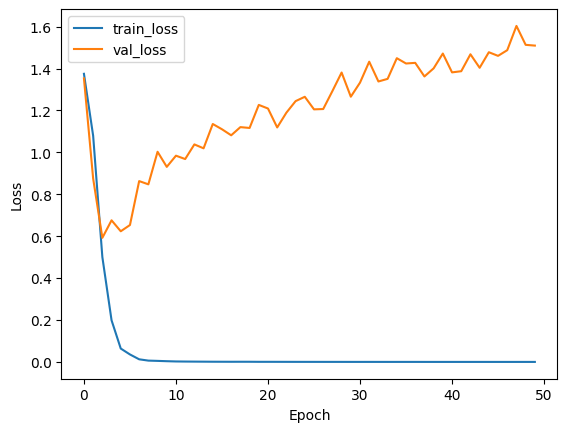

In [ ]:
#visualising the loss and the accuracy against the number of epochs
import matplotlib.pyplot as plt

# plotting the training and validation loss against the number of epochs

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

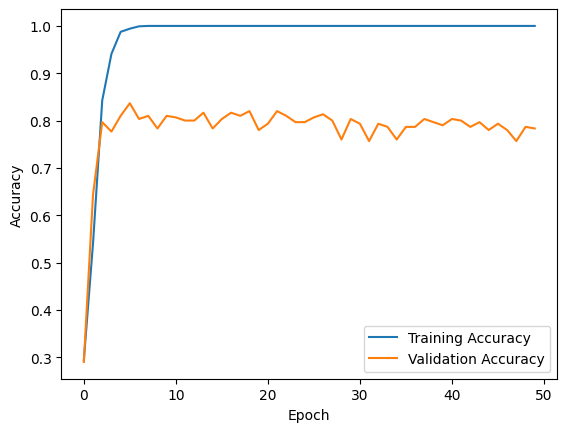

In [ ]:
import matplotlib.pyplot as plt

# getting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plotting training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluating the model

In [ ]:
#evaluate the model
model.evaluate(test_padded, test_labels)

16/16 [==============================] - 1s 9ms/step - loss: 1.1607 - accuracy: 0.8160


[1.1607439517974854, 0.8159999847412109]

In [ ]:
model.training = False
y_pred = model.predict(test_padded)

16/16 [==============================] - 0s 7ms/step


In [ ]:
y_pred_output = tf.math.argmax(y_pred, axis=-1)
y_pred_output

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([3, 3, 0, 0, 1, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 1, 1, 3, 2, 0, 3, 1,
       3, 2, 2, 1, 3, 2, 2, 2, 1, 0, 3, 1, 1, 2, 0, 1, 3, 2, 1, 0, 0, 3,
       0, 3, 1, 2, 1, 1, 3, 0, 2, 2, 1, 3, 3, 1, 1, 1, 0, 1, 3, 2, 0, 1,
       2, 2, 1, 2, 3, 1, 3, 1, 0, 3, 1, 1, 0, 0, 0, 3, 1, 3, 0, 2, 3, 1,
       0, 1, 2, 0, 1, 0, 3, 0, 3, 3, 3, 2, 2, 2, 2, 2, 0, 1, 2, 3, 2, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 3, 0, 0, 2, 1, 0, 0, 2, 0, 3, 1, 1, 1, 1,
       0, 0, 3, 3, 2, 2, 0, 1, 0, 3, 0, 0, 2, 3, 0, 0, 3, 1, 3, 1, 3, 3,
       1, 1, 2, 3, 1, 0, 1, 1, 0, 0, 2, 1, 3, 1, 3, 3, 3, 0, 0, 3, 1, 0,
       2, 1, 2, 1, 3, 2, 0, 2, 1, 3, 3, 1, 3, 3, 3, 3, 0, 2, 0, 1, 1, 1,
       1, 1, 2, 0, 1, 3, 1, 2, 2, 3, 3, 0, 1, 2, 3, 1, 3, 1, 0, 1, 0, 2,
       3, 1, 3, 3, 2, 2, 0, 1, 0, 1, 0, 3, 1, 0, 3, 2, 2, 3, 3, 1, 0, 3,
       3, 2, 1, 0, 0, 3, 0, 3, 3, 1, 0, 0, 2, 0, 1, 2, 3, 1, 3, 3, 2, 0,
       1, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 0, 3, 3, 1, 3, 0, 0, 2, 2, 0, 0,
     

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#classification report
print(classification_report(test_labels, y_pred_output))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       125
           1       0.72      0.81      0.76       125
           2       0.94      0.90      0.92       125
           3       0.78      0.83      0.80       125

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



Second Implementation: Considering the Comments Dataset

In [ ]:
final_comments['label']= label_encoder.fit_transform(final_comments['site'])


In order to implement the baseline model on the comments dataframe, the following is being executed:
<br>
- Splitting the dataframe into training and testing datasets.
<br>
- Defining the Tokenizer and fitting it to the training set.
<br>
- Converting the text data to sequences of integers.
<br>
- Padding the sequences in order to have a uniform length.
<br>
- Converting the labels to integers.
<br>
- Building, compiling and training the model.

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# splitting the data into training and testing sets
train_x, test_x , train_y, test_y = train_test_split(final_comments['Text'], final_comments['label'], stratify = final_comments['label'])

# defining the tokenizer and fitting it to the training data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_x)

# converting the text data to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

# padding the sequences to have a uniform length
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# converting the labels to integers
train_labels = train_y.values
test_labels = test_y.values

# building the model
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=64, input_length=max_length))
model.add(LSTM(units=64))
model.add(Dense(units=4, activation='softmax'))

# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training the model
history = model.fit(train_padded, train_labels, epochs=50, batch_size=32, validation_split=(0.2))


Epoch 1/50
38/38 [==============================] - 14s 244ms/step - loss: 1.3890 - accuracy: 0.2275 - val_loss: 1.3873 - val_accuracy: 0.2433
Epoch 2/50
38/38 [==============================] - 10s 268ms/step - loss: 1.3879 - accuracy: 0.2350 - val_loss: 1.3866 - val_accuracy: 0.2367
Epoch 3/50
38/38 [==============================] - 6s 154ms/step - loss: 1.3871 - accuracy: 0.2417 - val_loss: 1.3875 - val_accuracy: 0.2367
Epoch 4/50
38/38 [==============================] - 4s 107ms/step - loss: 1.3870 - accuracy: 0.2525 - val_loss: 1.3866 - val_accuracy: 0.2433
Epoch 5/50
38/38 [==============================] - 4s 94ms/step - loss: 1.3871 - accuracy: 0.2267 - val_loss: 1.3863 - val_accuracy: 0.2567
Epoch 6/50
38/38 [==============================] - 4s 117ms/step - loss: 1.3868 - accuracy: 0.2508 - val_loss: 1.3870 - val_accuracy: 0.2433
Epoch 7/50
38/38 [==============================] - 6s 148ms/step - loss: 1.3868 - accuracy: 0.2308 - val_loss: 1.3864 - val_accuracy: 0.2367
Epoch

Building on top of the original model with a LSTM layer in order to try and improve the perforance 

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training the model
history = model.fit(train_padded, train_labels, epochs=50, batch_size=50, validation_split=(0.2))

Epoch 1/50
24/24 [==============================] - 16s 522ms/step - loss: 1.3866 - accuracy: 0.2608 - val_loss: 1.3843 - val_accuracy: 0.2900
Epoch 2/50
24/24 [==============================] - 6s 235ms/step - loss: 1.3465 - accuracy: 0.4667 - val_loss: 1.3690 - val_accuracy: 0.2900
Epoch 3/50
24/24 [==============================] - 5s 187ms/step - loss: 1.0927 - accuracy: 0.6642 - val_loss: 1.3196 - val_accuracy: 0.3833
Epoch 4/50
24/24 [==============================] - 4s 152ms/step - loss: 0.6419 - accuracy: 0.7983 - val_loss: 1.1830 - val_accuracy: 0.5000
Epoch 5/50
24/24 [==============================] - 3s 126ms/step - loss: 0.3104 - accuracy: 0.9117 - val_loss: 1.3601 - val_accuracy: 0.5200
Epoch 6/50
24/24 [==============================] - 5s 184ms/step - loss: 0.2225 - accuracy: 0.9508 - val_loss: 1.3463 - val_accuracy: 0.4633
Epoch 7/50
24/24 [==============================] - 3s 130ms/step - loss: 0.1141 - accuracy: 0.9792 - val_loss: 1.3519 - val_accuracy: 0.5333
Epoch

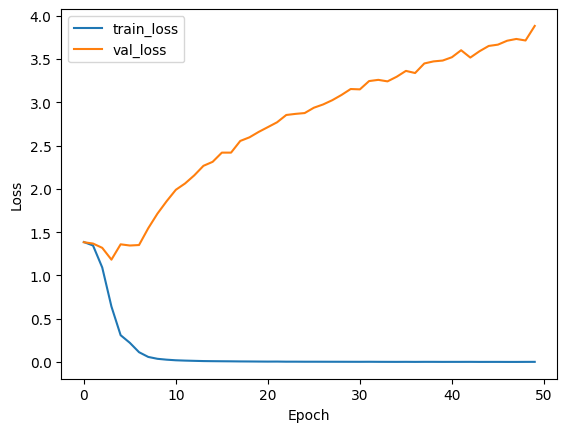

In [ ]:
#visualising the loss and the accuracy against the number of epochs
import matplotlib.pyplot as plt

# plotting the training and validation loss against the number of epochs

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

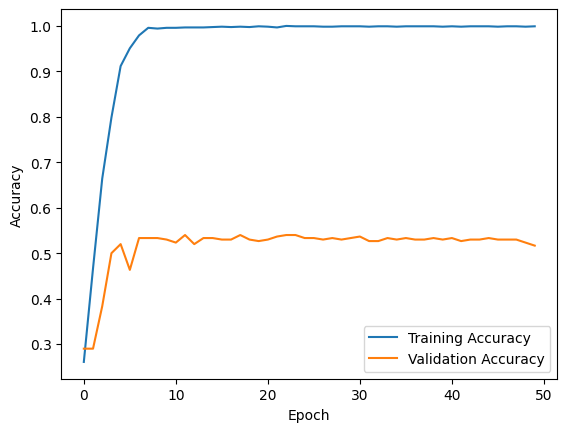

In [ ]:
import matplotlib.pyplot as plt

# getting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plotting training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluating the model

In [ ]:
#evaluate the model
model.evaluate(test_padded, test_labels)

16/16 [==============================] - 1s 8ms/step - loss: 3.2562 - accuracy: 0.5360


[3.2561604976654053, 0.5360000133514404]

In [ ]:
model.training = False
y_pred = model.predict(test_padded)

16/16 [==============================] - 1s 7ms/step


In [ ]:
y_pred_output = tf.math.argmax(y_pred, axis=-1)
y_pred_output

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([1, 3, 2, 1, 1, 2, 1, 3, 0, 0, 3, 3, 1, 2, 0, 0, 1, 1, 3, 2, 2, 0,
       1, 0, 2, 3, 3, 0, 3, 1, 2, 3, 3, 1, 1, 0, 2, 1, 1, 3, 0, 2, 1, 2,
       1, 1, 3, 3, 1, 0, 3, 1, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2,
       2, 1, 1, 2, 0, 0, 1, 2, 2, 3, 1, 1, 0, 3, 1, 1, 1, 3, 2, 2, 3, 1,
       0, 1, 3, 0, 3, 2, 1, 1, 3, 2, 1, 1, 1, 2, 1, 0, 2, 3, 0, 2, 2, 1,
       1, 3, 2, 1, 3, 2, 1, 2, 0, 1, 2, 1, 1, 3, 3, 0, 1, 2, 0, 0, 3, 2,
       0, 0, 1, 2, 3, 1, 2, 2, 1, 3, 0, 0, 1, 1, 2, 2, 3, 2, 3, 0, 3, 1,
       3, 3, 1, 0, 1, 3, 3, 2, 3, 1, 1, 2, 3, 2, 3, 2, 0, 3, 1, 3, 1, 3,
       2, 2, 1, 3, 0, 0, 2, 0, 1, 1, 0, 3, 2, 3, 0, 0, 2, 2, 1, 3, 1, 3,
       2, 2, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 3, 1, 1, 0, 0, 1, 2, 3, 2, 2,
       1, 1, 0, 2, 3, 1, 2, 0, 2, 2, 0, 2, 3, 2, 3, 0, 2, 2, 1, 3, 0, 3,
       1, 3, 2, 0, 3, 3, 0, 0, 3, 2, 1, 1, 2, 1, 3, 3, 1, 0, 0, 0, 1, 1,
       3, 3, 1, 3, 0, 1, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 0, 1, 2, 1, 2, 2,
     

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#classification report
print(classification_report(test_labels, y_pred_output))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51       125
           1       0.50      0.57      0.53       125
           2       0.56      0.62      0.59       125
           3       0.49      0.53      0.51       125

    accuracy                           0.54       500
   macro avg       0.55      0.54      0.53       500
weighted avg       0.55      0.54      0.53       500



# 6. Implementing GPT

In [18]:
import tensorflow as tf #import libraries
from transformers import TFGPT2Tokenizer, TFGPT2Model
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer

In [19]:
import math

First Implementation: Considering the posts dataset

In order to implement the GPT2 model on the posts dataframe, the following is being executed:
<br>
- Splitting the dataframe into training and testing datasets.
<br>
- Defining the Tokenizer, adding the End Of Sentence Token at the end of each text.
<br>
- Passing the training data through the Tokeniser, padding it to the maximum length.
<br>
- Getting the mask from the Tokeniser.
<br>
- Adding layers to the original model, compiling and training the model.

In [ ]:
#splitting the data into training and testing data
X = final['Body']
y = final['site']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
#selecting max length, the max length will be the average length of the body text
MAX_LENGTH = math.ceil((X_train.apply(lambda x: len(str(x).split())).mean()))
MAX_LENGTH

65

In [ ]:

PAD_TOKEN = "<|pad|>"
EOS_TOKEN = "<|endoftext|>"

# this will download and initialize the pre trained tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2",
    pad_token=PAD_TOKEN,
    eos_token=EOS_TOKEN,
    max_length=MAX_LENGTH,
    is_split_into_words=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# adding the EOS token at the end of each text in the body column

X_train = [str(ex) + EOS_TOKEN for ex in X_train]
X_test = [str(ex) + EOS_TOKEN for ex in X_test]

In [ ]:
# pass the body texts through the tokenizer, padding them to the max_length

X_train1 = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_train]
X_test1 = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_test]

X_train2 = tf.squeeze(tf.convert_to_tensor(X_train1), axis=1)
X_test2 = tf.squeeze(tf.convert_to_tensor(X_test1), axis=1)
     

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
#getting the mask from the tokeniser
X_train_mask1 = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_train]
X_test_mask1 = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_test]

X_train_mask = tf.squeeze(tf.convert_to_tensor(X_train_mask1), axis=1)
X_test_mask = tf.squeeze(tf.convert_to_tensor(X_test_mask1), axis=1)
     

In [ ]:
#initialising the model 

model = TFGPT2Model.from_pretrained("gpt2", use_cache=False,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id)
model.training = True

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:

model.resize_token_embeddings(len(tokenizer))

In [ ]:
#setting the already trained layers as non trainable

for layer in model.layers:
    layer.trainable = False

In [ ]:
#looking at the model
model.summary()

Model: "tfgpt2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 124440576 
 r)                                                              
                                                                 
Total params: 163,038,720
Trainable params: 38,598,144
Non-trainable params: 124,440,576
_________________________________________________________________


In [ ]:
#adding layers to the original gpt2

input = tf.keras.layers.Input(shape=(None,), dtype='int32')
mask = tf.keras.layers.Input(shape=(None,), dtype='int32')
x = model(input, attention_mask=mask)
x = tf.reduce_mean(x.last_hidden_state, axis=1)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(4, activation='softmax')(x)

In [ ]:
model1 = tf.keras.Model([input, mask], output)

In [ ]:
tf.keras.mixed_precision.set_global_policy('mixed_float16') #enabling precision training to decrease usage of memory 

In [ ]:
#specifying learning rate, optimizer and loss
learning_rate = 0.0005
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss=tf.keras.losses.SparseCategoricalCrossentropy()

model1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
#adding a callback function
callbacks = tf.keras.callbacks.EarlyStopping(
        monitor="accuracy", verbose=1, patience=3, restore_best_weights=True)

In [ ]:
#creating a function to prepare the target sensor
def map_category(value):
  if value == 'biology':
    return 0
  if value == 'chemistry':
    return 1
  if value == 'physics':
    return 2
  if value == 'datascience':
    return 3

In [ ]:
#mapping the function to my data points
y_train1 = y_train.map(map_category)
y_test1 = y_test.map(map_category)

In [ ]:
y_train2 = tf.constant(y_train1, dtype=tf.int32)
y_test2 = tf.constant(y_test1, dtype=tf.int32)
     

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
#training the model 

history = model1.fit([X_train2, X_train_mask], y_train2, epochs=30, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


38/38 [==============================] - 28s 744ms/step - loss: 5.4402 - accuracy: 0.2650 - val_loss: 1.6915 - val_accuracy: 0.4967
Epoch 2/30
38/38 [==============================] - 28s 739ms/step - loss: 2.0705 - accuracy: 0.4175 - val_loss: 1.0078 - val_accuracy: 0.6633
Epoch 3/30
38/38 [==============================] - 29s 772ms/step - loss: 0.9755 - accuracy: 0.6225 - val_loss: 0.8301 - val_accuracy: 0.7267
Epoch 4/30
38/38 [==============================] - 28s 746ms/step - loss: 0.7171 - accuracy: 0.7275 - val_loss: 0.6919 - val_accuracy: 0.7700
Epoch 5/30
38/38 [==============================] - 28s 730ms/step - loss: 0.5978 - accuracy: 0.7750 - val_loss: 0.6308 - val_accuracy: 0.7767
Epoch 6/30
38/38 [==============================] - 28s 749ms/step - loss: 0.5100 - accuracy: 0.8158 - val_loss: 0.5975 - val_accuracy: 0.7667
Epoch 7/30
38/38 [==============================] - 31s 807ms/step - loss: 0.4455 - accuracy: 0.8325 - val_loss: 0.5399 - val_accuracy: 0.7867
Epoch 8/30

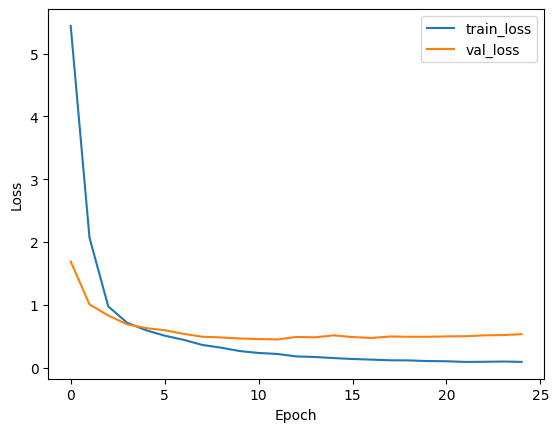

In [ ]:
#visualising the loss and the accuracy against the number of epochs
import matplotlib.pyplot as plt

# plotting the training and validation loss against the number of epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

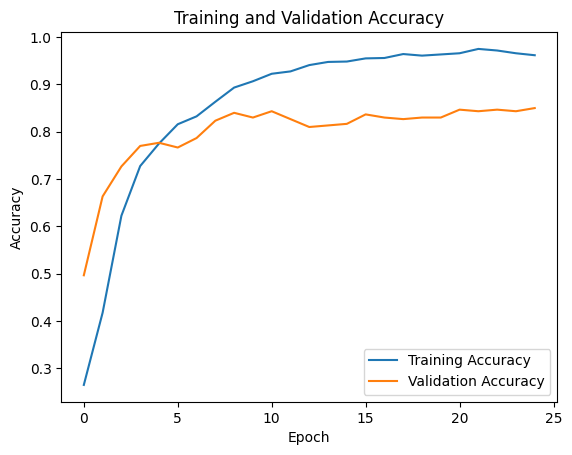

In [ ]:
import matplotlib.pyplot as plt

# getting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plotting training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate the model
model1.evaluate([X_test2, X_test_mask], y_test2)

16/16 [==============================] - 4s 262ms/step - loss: 0.5597 - accuracy: 0.8460


[0.5597201585769653, 0.8460000157356262]

In [ ]:
#calculating the predictions
model1.training = False
y_pred = model1.predict([X_test2, X_test_mask])

16/16 [==============================] - 3s 196ms/step


In [ ]:
#printing the predictions
y_pred_output = tf.math.argmax(y_pred, axis=-1)
y_pred_output

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([0, 3, 1, 0, 3, 1, 1, 2, 0, 2, 2, 2, 3, 2, 3, 0, 2, 1, 0, 0, 2, 2,
       0, 1, 1, 0, 0, 0, 1, 2, 1, 3, 1, 1, 2, 0, 2, 2, 1, 0, 3, 2, 0, 2,
       0, 2, 2, 2, 3, 0, 3, 0, 3, 2, 0, 0, 2, 3, 1, 1, 2, 2, 1, 2, 0, 1,
       3, 1, 3, 2, 0, 1, 2, 2, 3, 3, 3, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 3,
       2, 1, 1, 3, 1, 3, 2, 0, 2, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 0, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 3, 0, 0, 2, 0, 2, 3, 3, 2, 0, 3,
       0, 2, 2, 3, 0, 0, 2, 0, 3, 2, 0, 1, 0, 0, 1, 3, 3, 2, 3, 0, 2, 3,
       1, 2, 3, 1, 3, 0, 2, 3, 0, 2, 3, 1, 3, 1, 3, 2, 2, 3, 2, 1, 1, 2,
       3, 2, 3, 2, 1, 0, 0, 2, 1, 3, 1, 0, 0, 3, 0, 1, 0, 1, 2, 1, 3, 1,
       2, 1, 1, 0, 0, 3, 0, 3, 1, 2, 0, 2, 1, 3, 2, 3, 0, 1, 1, 3, 3, 1,
       1, 1, 2, 0, 3, 2, 3, 0, 3, 2, 2, 3, 1, 0, 3, 2, 1, 0, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 3, 2, 0, 0, 0, 0, 2, 3, 0, 2,
       0, 2, 3, 3, 2, 0, 3, 1, 1, 3, 0, 2, 3, 0, 2, 3, 1, 3, 1, 3, 2, 2,
     

In [45]:

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#classification report
print(classification_report(y_test2, y_pred_output))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       125
           1       0.74      0.86      0.80       125
           2       0.85      0.88      0.86       125
           3       0.90      0.90      0.90       125

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



Second Implementation: Considering the comments dataset

In order to implement the GPT2 model on the comments dataframe, the following is being executed:
<br>
- Splitting the dataframe into training and testing datasets.
<br>
- Defining the Tokenizer, adding the End Of Sentence Token at the end of each text.
<br>
- Passing the training data through the Tokeniser, padding it to the maximum length.
<br>
- Getting the mask from the Tokeniser.
<br>
- Adding layers to the original model, compiling and training the model.

In [20]:
#splitting the data into training and testing data
X = final_comments['Text']
y = final_comments['site']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [21]:
#seelecting max length, the max length will be the average length of the body text
MAX_LENGTH = math.ceil((X_train.apply(lambda x: len(str(x).split())).mean()))
MAX_LENGTH

18

In [22]:
PAD_TOKEN = "<|pad|>"
EOS_TOKEN = "<|endoftext|>"

# this will download and initialize the pre trained tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2",
    pad_token=PAD_TOKEN,
    eos_token=EOS_TOKEN,
    max_length=MAX_LENGTH,
    is_split_into_words=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [23]:
# adding the EOS token at the end of each text in the body column

X_train = [str(ex) + EOS_TOKEN for ex in X_train]
X_test = [str(ex) + EOS_TOKEN for ex in X_test]

In [24]:
# pass the body texts through the tokenizer, padding them to the max_length

X_train1 = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_train]
X_test1 = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_test]

X_train2 = tf.squeeze(tf.convert_to_tensor(X_train1), axis=1)
X_test2 = tf.squeeze(tf.convert_to_tensor(X_test1), axis=1)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [25]:
#getting the mask from the tokeniser
X_train_mask1 = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_train]
X_test_mask1 = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_test]

X_train_mask = tf.squeeze(tf.convert_to_tensor(X_train_mask1), axis=1)
X_test_mask = tf.squeeze(tf.convert_to_tensor(X_test_mask1), axis=1)
     

In [26]:
#initialising the model 

model = TFGPT2Model.from_pretrained("gpt2", use_cache=False,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id)
model.training = True

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [27]:

model.resize_token_embeddings(len(tokenizer))

In [28]:
#setting the already trained layers as non trainable

for layer in model.layers:
    layer.trainable = False

In [29]:
#adding layers to the original gpt2

input = tf.keras.layers.Input(shape=(None,), dtype='int32')
mask = tf.keras.layers.Input(shape=(None,), dtype='int32')
x = model(input, attention_mask=mask)
x = tf.reduce_mean(x.last_hidden_state, axis=1)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(4, activation='softmax')(x)

In [30]:
model2 = tf.keras.Model([input, mask], output)

In [31]:
#adding learning rate, loss and optimizer
learning_rate = 0.0005
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss=tf.keras.losses.SparseCategoricalCrossentropy()

model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [32]:
#adding a callback function
callbacks = tf.keras.callbacks.EarlyStopping(
        monitor="accuracy", verbose=1, patience=3, restore_best_weights=True)

In [33]:
#creating a function to prepare the target sensor
def map_category(value):
  if value == 'biology':
    return 0
  if value == 'chemistry':
    return 1
  if value == 'physics':
    return 2
  if value == 'datascience':
    return 3

In [34]:
#mapping the function to my data points
y_train1 = y_train.map(map_category)
y_test1 = y_test.map(map_category)

In [35]:
y_train2 = tf.constant(y_train1, dtype=tf.int32)
y_test2 = tf.constant(y_test1, dtype=tf.int32)

In [36]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [37]:
history = model2.fit([X_train2, X_train_mask], y_train2, epochs=30, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


38/38 [==============================] - 25s 668ms/step - loss: 10.4063 - accuracy: 0.2417 - val_loss: 1.9627 - val_accuracy: 0.2900
Epoch 2/30
38/38 [==============================] - 25s 663ms/step - loss: 4.3522 - accuracy: 0.2892 - val_loss: 1.4584 - val_accuracy: 0.3267
Epoch 3/30
38/38 [==============================] - 24s 635ms/step - loss: 2.4510 - accuracy: 0.2925 - val_loss: 1.3809 - val_accuracy: 0.3833
Epoch 4/30
38/38 [==============================] - 27s 705ms/step - loss: 1.4142 - accuracy: 0.3858 - val_loss: 1.4119 - val_accuracy: 0.4100
Epoch 5/30
38/38 [==============================] - 25s 673ms/step - loss: 1.2382 - accuracy: 0.4083 - val_loss: 1.3796 - val_accuracy: 0.4067
Epoch 6/30
38/38 [==============================] - 24s 625ms/step - loss: 1.1828 - accuracy: 0.4708 - val_loss: 1.3177 - val_accuracy: 0.5033
Epoch 7/30
38/38 [==============================] - 24s 622ms/step - loss: 1.1452 - accuracy: 0.4792 - val_loss: 1.2898 - val_accuracy: 0.5167
Epoch 8/3

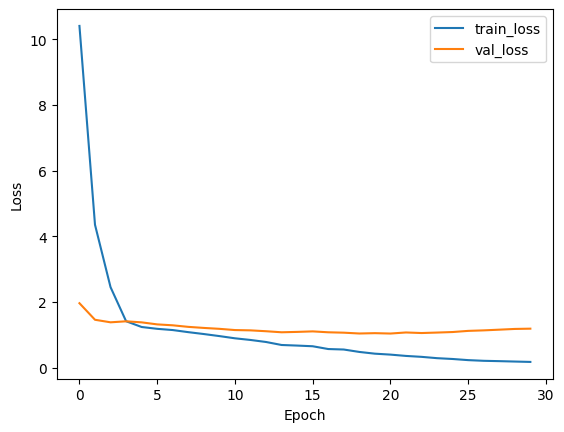

In [38]:
#visualising the loss and the accuracy against the number of epochs
import matplotlib.pyplot as plt

# plotting the training and validation loss against the number of epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

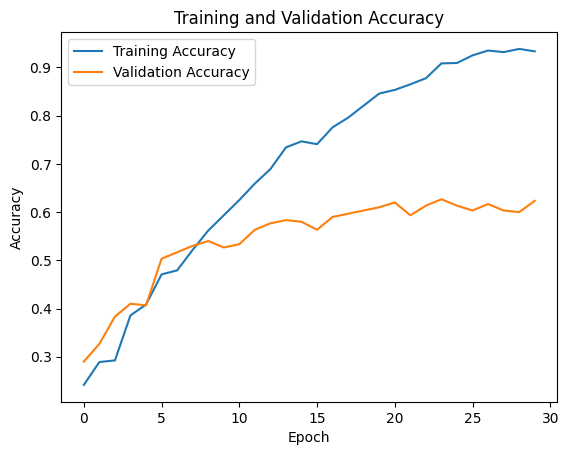

In [39]:
import matplotlib.pyplot as plt

# getting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plotting training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
model2.evaluate([X_test2, X_test_mask], y_test2) #evaluating the model

16/16 [==============================] - 4s 267ms/step - loss: 1.2247 - accuracy: 0.5980


[1.224740743637085, 0.5979999899864197]

In [42]:
model2.training = False
y_pred = model2.predict([X_test2, X_test_mask])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/16 [==============================] - 9s 562ms/step


In [43]:
#printing the predictions
y_pred_output = tf.math.argmax(y_pred, axis=-1)
y_pred_output

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([1, 1, 3, 0, 1, 3, 0, 0, 3, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 3, 3, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 3, 3, 1, 2, 3, 3, 3, 3, 0, 2,
       2, 2, 0, 2, 1, 3, 3, 1, 2, 2, 2, 3, 0, 3, 0, 0, 0, 1, 3, 2, 0, 2,
       2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 3, 1, 2, 3, 0, 1,
       0, 2, 2, 2, 3, 0, 3, 0, 0, 2, 3, 0, 0, 3, 2, 0, 1, 0, 2, 1, 0, 3,
       1, 2, 2, 0, 2, 0, 3, 3, 1, 3, 1, 2, 3, 3, 1, 2, 2, 2, 3, 0, 1, 0,
       0, 1, 2, 0, 3, 1, 0, 3, 1, 1, 1, 2, 3, 0, 1, 3, 2, 3, 1, 0, 2, 2,
       2, 2, 1, 0, 3, 2, 1, 2, 0, 1, 2, 3, 2, 3, 0, 2, 0, 0, 3, 0, 2, 0,
       2, 3, 0, 2, 2, 2, 1, 1, 3, 1, 1, 2, 0, 0, 1, 2, 1, 2, 3, 0, 0, 1,
       0, 3, 2, 0, 1, 3, 3, 3, 2, 1, 1, 2, 3, 0, 2, 1, 1, 3, 1, 1, 0, 0,
       1, 2, 0, 3, 1, 3, 2, 1, 2, 3, 0, 2, 2, 1, 0, 2, 2, 2, 3, 3, 2, 3,
       2, 0, 1, 3, 1, 3, 0, 3, 0, 3, 3, 0, 2, 0, 3, 0, 1, 3, 2, 1, 2, 3,
       3, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 3, 1, 3, 0, 1, 0, 2, 2,
     

In [46]:
#classification report
print(classification_report(y_test2, y_pred_output))  #printing a classification report

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       125
           1       0.59      0.55      0.57       125
           2       0.55      0.60      0.57       125
           3       0.71      0.67      0.69       125

    accuracy                           0.60       500
   macro avg       0.60      0.60      0.60       500
weighted avg       0.60      0.60      0.60       500



# 7. Implementing BERT

In [47]:
!pip install tensorflow_hub
import tensorflow_hub as hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


First implementation: Considering only the posts dataset

In order to implement the BERT model on the posts dataframe, the following is being executed:
<br>
- Splitting the dataframe into training and testing datasets.
<br>
- Adding the CLS and SEP special tokens to the beginning of the input text and the separation between sentences respectively.
<br>
- Getting the sentence embeddings.
<br>
- Adding layers to the original model in order to improve the performance.
<br>
- Building, compiling and training the model.


In [48]:
# importing label encoder
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# encoding labels in column 'site'.
final['label']= label_encoder.fit_transform(final['site'])

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final['Body'],final['label'], stratify=final['label'])

In [50]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 44.0 MB/s eta 0:00:00


In [51]:
import tensorflow_text as text

In [52]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [53]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [55]:
# implementing BERT layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# adding neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(4, activation='sigmoid', name="output")(l)

# using inputs and outputs to build the final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, epochs=30, batch_size = 32, validation_split = 0.2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


38/38 [==============================] - 49s 993ms/step - loss: 1.4576 - accuracy: 0.2992 - val_loss: 1.2923 - val_accuracy: 0.4467
Epoch 2/30
38/38 [==============================] - 39s 1s/step - loss: 1.3042 - accuracy: 0.3792 - val_loss: 1.2522 - val_accuracy: 0.4167
Epoch 3/30
38/38 [==============================] - 41s 1s/step - loss: 1.2594 - accuracy: 0.4342 - val_loss: 1.2548 - val_accuracy: 0.4533
Epoch 4/30
38/38 [==============================] - 37s 974ms/step - loss: 1.2494 - accuracy: 0.4208 - val_loss: 1.1925 - val_accuracy: 0.4767
Epoch 5/30
38/38 [==============================] - 37s 980ms/step - loss: 1.1727 - accuracy: 0.5058 - val_loss: 1.2186 - val_accuracy: 0.4700
Epoch 6/30
38/38 [==============================] - 37s 966ms/step - loss: 1.1247 - accuracy: 0.5350 - val_loss: 1.0987 - val_accuracy: 0.5567
Epoch 7/30
38/38 [==============================] - 37s 971ms/step - loss: 1.0934 - accuracy: 0.5633 - val_loss: 1.0618 - val_accuracy: 0.6133
Epoch 8/30
38/38

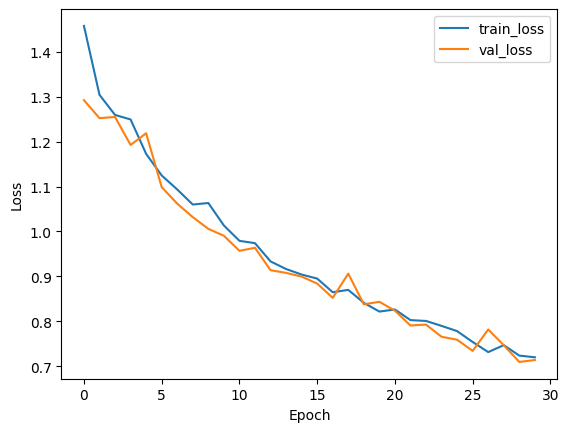

In [58]:
#visualising the loss and the accuracy against the number of epochs
import matplotlib.pyplot as plt

# plotting the training and validation loss against the number of epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

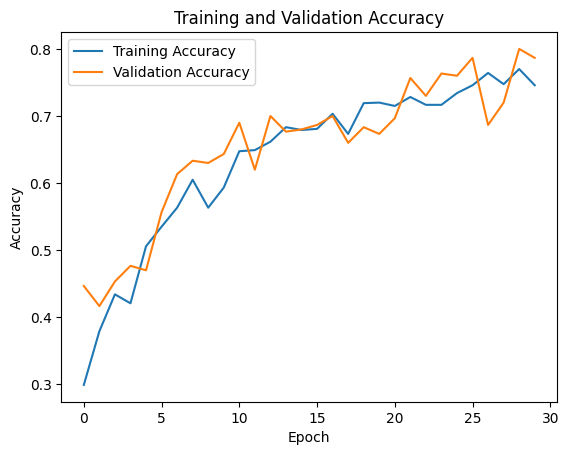

In [59]:
import matplotlib.pyplot as plt

# getting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plotting training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
model.evaluate(X_test, y_test) #evaluating the model

16/16 [==============================] - 6s 345ms/step - loss: 0.7342 - accuracy: 0.7800


[0.7341657280921936, 0.7799999713897705]

In [72]:
y_predicted = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/16 [==============================] - 5s 337ms/step


In [73]:
y_pred_output = tf.math.argmax(y_predicted, axis=-1)

In [75]:
print(classification_report(y_test,y_pred_output)) #printing a classification report

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       125
           1       0.92      0.63      0.75       125
           2       0.73      0.84      0.78       125
           3       0.78      0.80      0.79       125

    accuracy                           0.78       500
   macro avg       0.79      0.78      0.78       500
weighted avg       0.79      0.78      0.78       500



Second implementation: Considering only the comments dataset

In order to implement the BERT model on the comments dataframe, the following is being executed:
<br>
- Splitting the dataframe into training and testing datasets.
<br>
- Adding the CLS and SEP special tokens to the beginning of the input text and the separation between sentences respectively.
<br>
- Getting the sentence embeddings.
<br>
- Adding layers to the original model in order to improve the performance.
<br>
- Building, compiling and training the model.


In [76]:
# importing label encoder
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# encoding labels in column 'site'.
final_comments['label']= label_encoder.fit_transform(final_comments['site'])

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_comments['Text'],final_comments['label'], stratify=final_comments['label'])

In [79]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [80]:
# adding BERT layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# adding neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(4, activation='sigmoid', name="output")(l)

# using inputs and outputs to build our final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [82]:
history = model.fit(X_train, y_train, epochs=30, batch_size = 32, validation_split = 0.2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


38/38 [==============================] - 45s 905ms/step - loss: 1.4369 - accuracy: 0.2558 - val_loss: 1.3643 - val_accuracy: 0.3133
Epoch 2/30
38/38 [==============================] - 34s 897ms/step - loss: 1.3962 - accuracy: 0.3075 - val_loss: 1.3719 - val_accuracy: 0.3000
Epoch 3/30
38/38 [==============================] - 36s 964ms/step - loss: 1.3460 - accuracy: 0.3408 - val_loss: 1.3730 - val_accuracy: 0.2867
Epoch 4/30
38/38 [==============================] - 35s 923ms/step - loss: 1.3417 - accuracy: 0.3558 - val_loss: 1.3038 - val_accuracy: 0.3967
Epoch 5/30
38/38 [==============================] - 35s 928ms/step - loss: 1.3005 - accuracy: 0.4050 - val_loss: 1.3331 - val_accuracy: 0.3167
Epoch 6/30
38/38 [==============================] - 37s 973ms/step - loss: 1.2864 - accuracy: 0.4100 - val_loss: 1.2567 - val_accuracy: 0.4533
Epoch 7/30
38/38 [==============================] - 37s 972ms/step - loss: 1.2619 - accuracy: 0.4283 - val_loss: 1.2562 - val_accuracy: 0.4433
Epoch 8/30

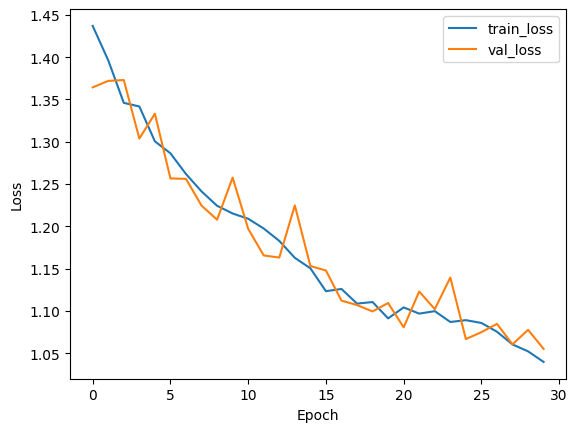

In [83]:
#visualising the loss and the accuracy against the number of epochs
import matplotlib.pyplot as plt

# plotting the training and validation loss against the number of epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

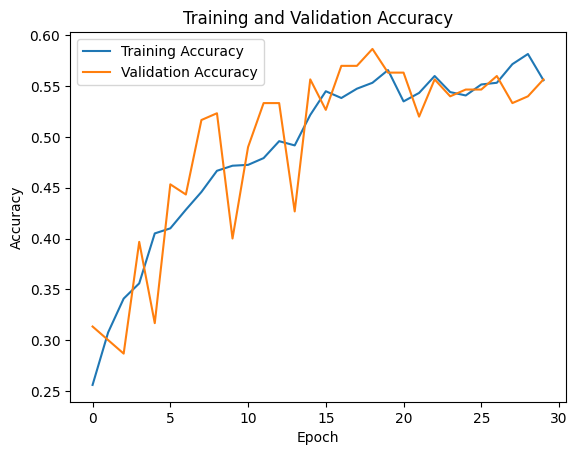

In [84]:
import matplotlib.pyplot as plt

# getting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plotting training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
model.evaluate(X_test, y_test) #evaluating the model

16/16 [==============================] - 6s 343ms/step - loss: 1.0672 - accuracy: 0.5600


[1.0671639442443848, 0.5600000023841858]

In [86]:
y_predicted = model.predict(X_test)
y_pred_output = tf.math.argmax(y_predicted, axis=-1)

16/16 [==============================] - 5s 337ms/step


In [87]:
print(classification_report(y_test,y_pred_output)) #printing a classification report

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       125
           1       0.47      0.52      0.49       125
           2       0.67      0.64      0.65       125
           3       0.59      0.51      0.55       125

    accuracy                           0.56       500
   macro avg       0.57      0.56      0.56       500
weighted avg       0.57      0.56      0.56       500

